In [424]:
import librosa
import librosa.display
%pylab inline --no-import-all
from scikits.audiolab import wavread
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import math
import numpy as np
from numpy.fft import fft
import pylab
import mir_eval
import seaborn
seaborn.set(style="ticks")


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [607]:
from IPython.display import Audio
from IPython import display
def loadsingal(filename):
    signal ,sample_rate=librosa.load(filename, mono=True)
    signal=signal#[int(2.5 * sample_rate):int(3.0 * sample_rate)] 
    return signal ,sample_rate
    

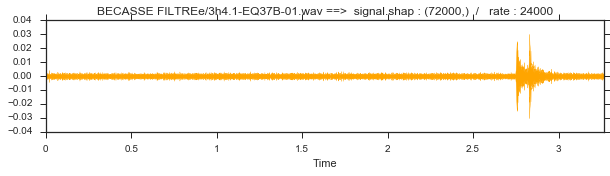

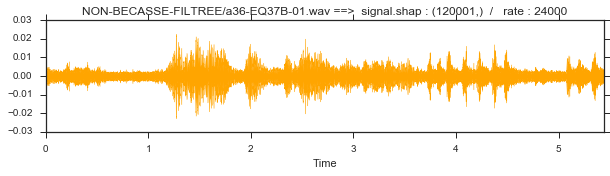

In [448]:
dir ="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/"
filenames=["BECASSE FILTREe/3h4.1-EQ37B-01.wav","NON-BECASSE-FILTREE/a36-EQ37B-01.wav"] #,"Becasse/3h3.wav","Becasse/5h541.wav","Becasse/5h571.wav","Becasse/7f236.wav","NonBecasse/a9.wav","NonBecasse/a770.wav"]
signals=[]
for filename in filenames:
    path=dir +filename
    signal ,sample_rate=loadsingal(path)
    signals.append(signal)
    
    color="orange"
    if filename.split("/")[0]=="Becasse":
        color="green"
    plt.figure(figsize=(10,2))
    librosa.display.waveplot(signal,color=color)
    titre=filename +' ==>  signal.shap : '+str(signal.shape) +'  /   rate : '+str(sample_rate)
    plt.title(titre)
    plt.show()
    
    display.display(Audio(data=signal,rate=sample_rate))

/BECASSE FILTREe/10f1-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


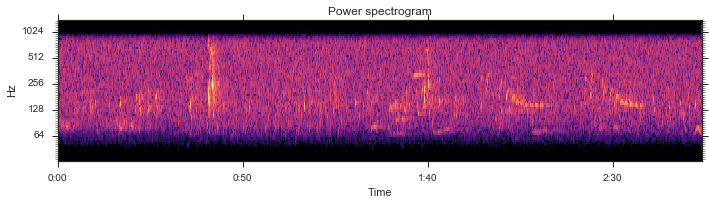

/BECASSE FILTREe/10f100-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


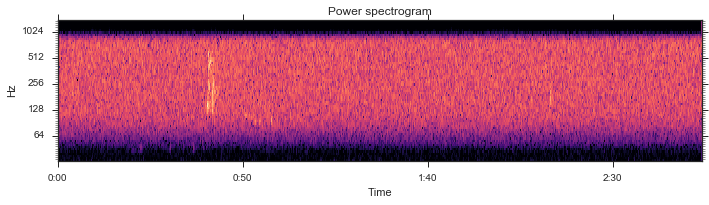

/BECASSE FILTREe/10f101-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


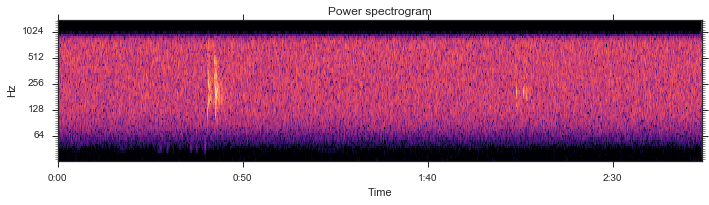

/BECASSE FILTREe/10f102-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


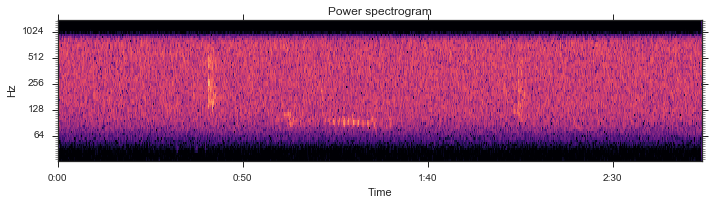

/BECASSE FILTREe/10f104-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


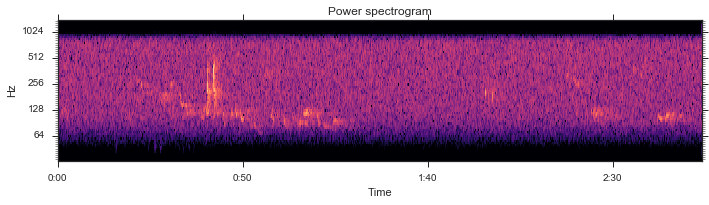

/BECASSE FILTREe/10f105-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


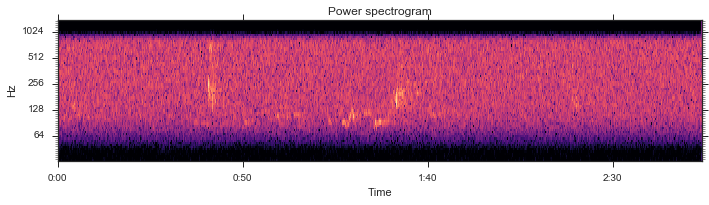

/BECASSE FILTREe/10f106-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


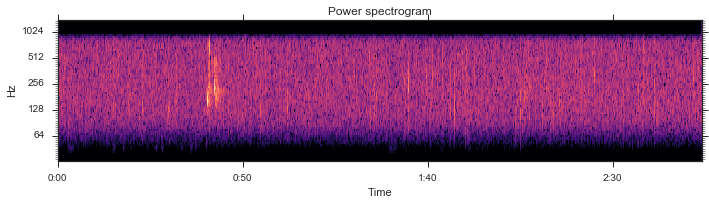

/BECASSE FILTREe/10f107-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


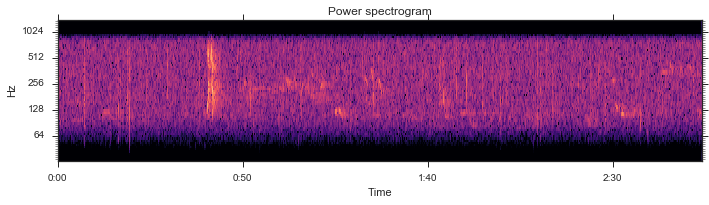

/BECASSE FILTREe/10f108-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


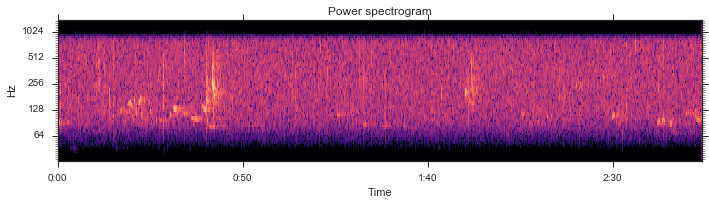

/BECASSE FILTREe/10f109-EQ37B-01.wav
D.shape (65, 7501)
log_power (65, 7501)


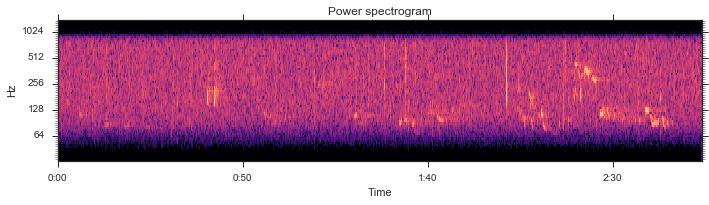

In [568]:

'''
Short-time Fourier transform (STFT)
Returns a complex-valued matrix D such that
np.abs(D[f, t]) is the magnitude of frequency bin f at frame t
np.angle(D[f, t]) is the phase of frequency bin f at frame t
'''

def STFT_log_power(signals,filenames):
    for i,signal in enumerate(signals):
        print filenames[i]
        D=librosa.stft(signal,n_fft=128)
        print "D.shape",D.shape
        
        log_power=librosa.logamplitude(D**2, ref_power=np.max)
        print "log_power",D.shape
        plt.figure(figsize=(10,3))
        librosa.display.specshow(log_power,x_axis="time",y_axis="cqt_hz")
        
        plt.title('Power spectrogram')
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
        plt.show()
STFT_log_power(signals,filenames)

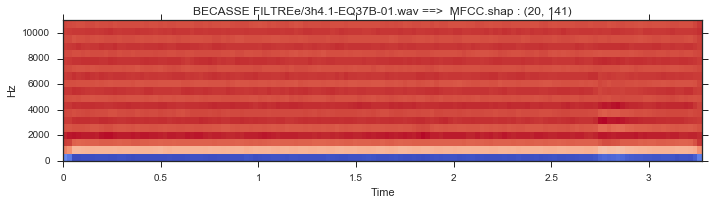

In [383]:
def MFCC(signals,filenames,plot=False):
    MFCCs=[]
    for i,signal in enumerate(signals):
        
        MFCC=librosa.feature.mfcc(signal,sample_rate)
        MFCCs.append(MFCC)
        if plot==True:
            titre=filenames[i] +' ==>  MFCC.shap : '+str(MFCC.shape)
            plt.figure(figsize=(10,3))
            librosa.display.specshow(MFCC,x_axis="time",y_axis="linear")
            plt.title(titre)
            plt.tight_layout()
            plt.show()
        
    return MFCCs
MFCCs=MFCC(signals,filenames,True)

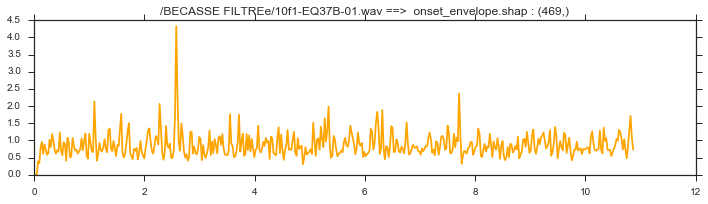

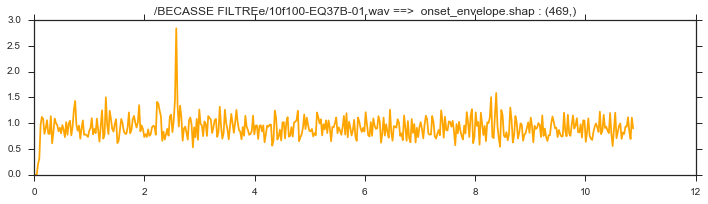

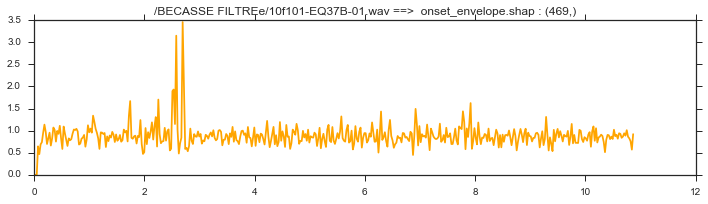

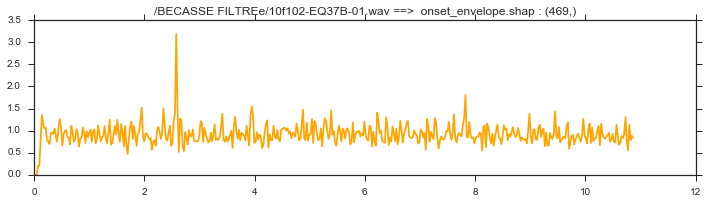

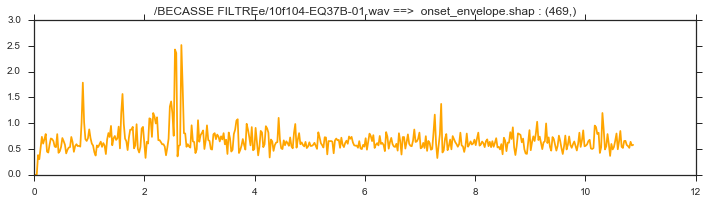

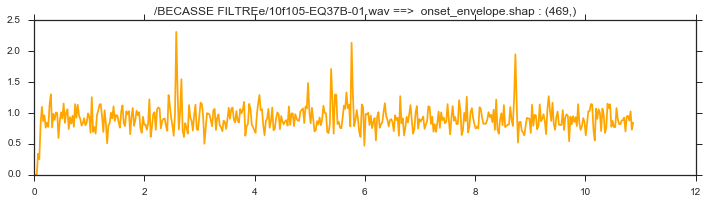

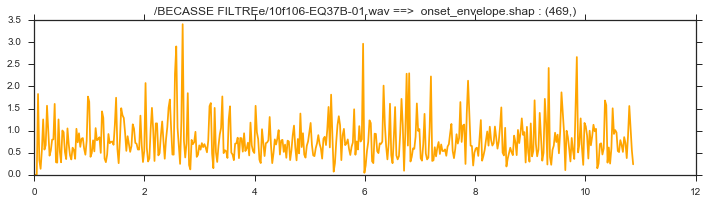

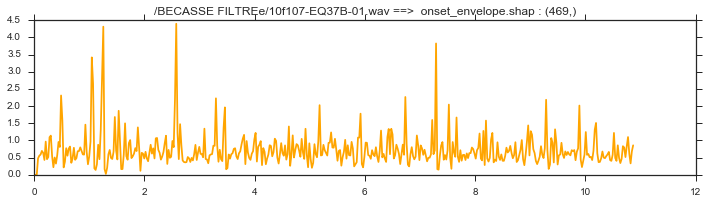

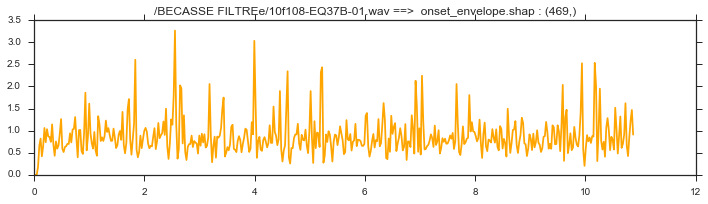

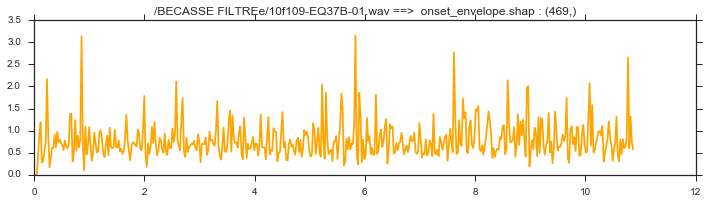

<type 'list'>
[ 0.          0.          0.          0.39438359  0.33902208  0.79784927
  0.9561535   0.60974432  0.8861989   0.73119029  0.58043401  0.62733629
  1.02087244  0.80660879  1.18795555  0.9950876   0.71776148  0.61278113
  0.71513019  0.6688729   1.23212028  0.71502625  0.56981543  0.94584483
  0.89010468  0.4084661   1.078161    0.95461405  0.50350312  0.54145221
  1.07573906  0.83752659  0.7036138   0.73379238  0.6178924   0.67562173
  0.7502864   1.05680703  0.71048485  0.99871132  1.19839274  0.5602921
  0.46566561  1.19466468  0.93708252  0.69535431  0.66315302  2.13409741
  1.10526721  0.41083628  0.61421994  0.92949963  0.71590052  0.67812783
  0.80318097  1.03776308  0.75508819  0.65578161  1.29634828  1.3434523
  0.7707104   0.68677569  0.99080778  0.77200763  0.5408751   0.86937946
  0.83886516  1.30595809  1.77729178  0.64917324  0.4995501   0.61795698
  0.91033528  1.26045379  1.49792454  0.64036781  0.53549275  0.45863529
  0.75660308  0.69988851  0.77993415  0

In [399]:
sample_rate=24000

def onset(signals,filenames,rate):
    onset_envelopes=[]
    for i,signal in enumerate(signals):
        
        onset_envelope=librosa.onset.onset_strength(signal,rate)
        #nsets=librosa.onset.onset_detect(onset_envelope)
        times = librosa.frames_to_time(np.arange(onset_envelope.shape[0]))
        
        onset_envelopes.append(onset_envelope)
        color="orange"
        if filenames[i].split("/")[0]=="Becasse":
            color="green"
        titre=filenames[i] +' ==>  onset_envelope.shap : '+str(onset_envelope.shape)
        plt.figure(figsize=(10,3))
        plt.plot(times,onset_envelope,label="onset strength",color=color) 
        
        plt.title(titre)
        plt.tight_layout()
        plt.show()
        
    return onset_envelopes
        
onset=onset(signals,filenames,sample_rate)
print type(onset)
print onset[0]


In [272]:
def Power_spectrogram(signal):
    D = librosa.stft(signal)
    times = librosa.frames_to_time(np.arange(D.shape[1]))
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
    plt.title('Power spectrogram')

    onset_envelope=librosa.onset.onset_strength(signal,sample_rate)
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, 2 + onset_envelope / onset_envelope.max(), alpha=0.8,label='Mean (mel)')


    onset_env1 = librosa.onset.onset_strength(y=signal, sr=sample_rate,aggregate=np.median,fmax=8000, n_mels=256)
    plt.plot(times, 1 + onset_env1 / onset_env1.max(), alpha=0.8,label='Median (custom mel)')

    onset_env = librosa.onset.onset_strength(y=signal, sr=sample_rate,feature=librosa.cqt)
    plt.plot(times, onset_env / onset_env.max(), alpha=0.8,label='Mean (CQT)')

    plt.legend(frameon=True, framealpha=0.75)
    plt.ylabel('Normalized strength')
    plt.yticks([])
    plt.axis('tight')
    plt.tight_layout()


    print "amplitude : ",librosa.amplitude_to_db(D, ref=np.max).shape
    print "Mean (mel) : ",onset_envelope.shape
    print "Median (custom mel) : ",onset_env1.shape
    print "Mean (CQT) : ",onset_env.shape




============================== filename :  Becasse/3h1.wav ============================== 
amplitude :  (1025, 141)
Mean (mel) :  (141,)
Median (custom mel) :  (141,)
Mean (CQT) :  (141,)


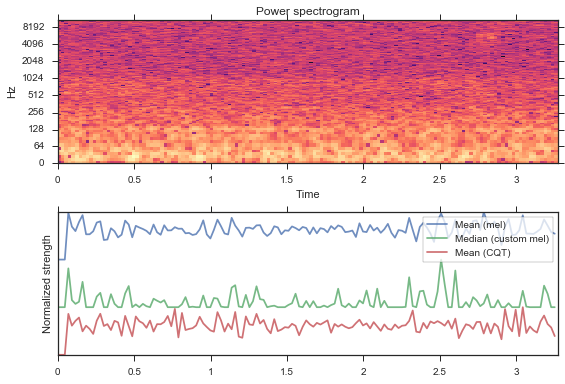

============================== filename :  Becasse/3h3.wav ============================== 
amplitude :  (1025, 141)
Mean (mel) :  (141,)
Median (custom mel) :  (141,)
Mean (CQT) :  (141,)


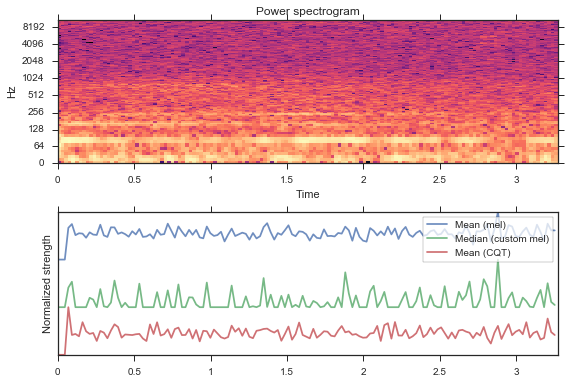

============================== filename :  Becasse/5h541.wav ============================== 
amplitude :  (1025, 235)
Mean (mel) :  (235,)
Median (custom mel) :  (235,)
Mean (CQT) :  (235,)


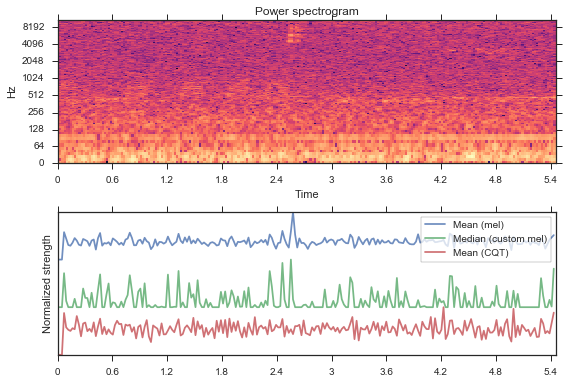

============================== filename :  Becasse/5h571.wav ============================== 
amplitude :  (1025, 235)
Mean (mel) :  (235,)
Median (custom mel) :  (235,)
Mean (CQT) :  (235,)


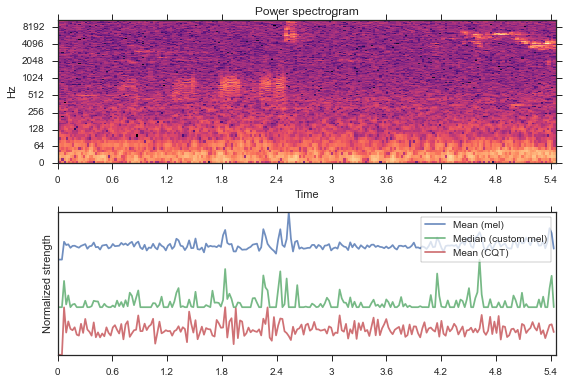

============================== filename :  Becasse/7f236.wav ============================== 
amplitude :  (1025, 329)
Mean (mel) :  (329,)
Median (custom mel) :  (329,)
Mean (CQT) :  (329,)


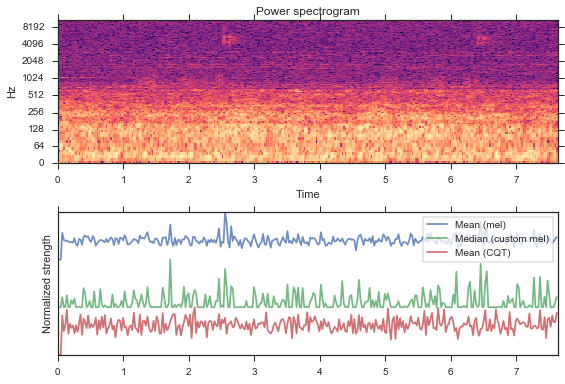

============================== filename :  NonBecasse/a9.wav ============================== 
amplitude :  (1025, 235)
Mean (mel) :  (235,)
Median (custom mel) :  (235,)
Mean (CQT) :  (235,)


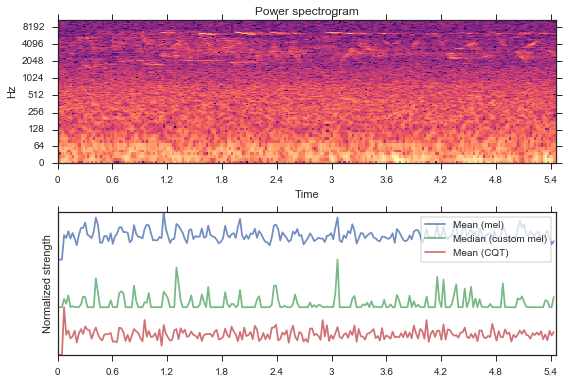

============================== filename :  NonBecasse/a770.wav ============================== 
amplitude :  (1025, 469)
Mean (mel) :  (469,)
Median (custom mel) :  (469,)
Mean (CQT) :  (469,)


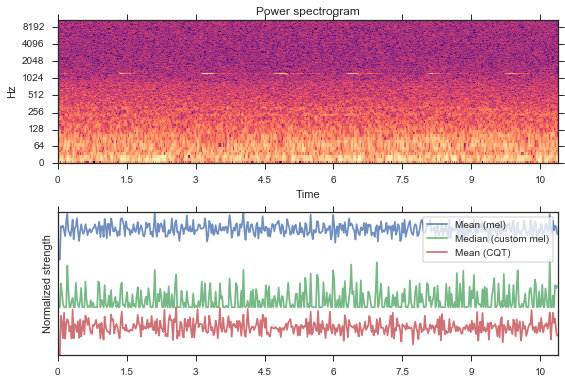

In [273]:
def Power_spectrogram_all(signals,filenames):
    for i,signal in enumerate(signals):
        print "============================== filename : ",filenames[i] , "============================== "
        Power_spectrogram(signal)
        
        plt.show()
        
Power_spectrogram_all(signals,filenames)

# Model contruct

In [549]:
def loadsingal_noise(filename):
    
    signal ,sample_rate=librosa.load(filename,sr=24000, mono=True)
    t=3
    noise_power = 0.01 * sample_rate / 2
    noise = np.random.normal(scale=np.sqrt(noise_power), size=t.shape)
    noise *= np.exp(-t/5)
    
    signal=signal+noise#[int(2.5 * sample_rate):int(3.0 * sample_rate)] 
    return signal ,sample_rate

In [ ]:
def pad_audio(data, fs, T):
    # Calculate target number of samples
    N_tar = int(fs * T)
    # Calculate number of zero samples to append
    shape = data.shape
    # Create the target shape    
    N_pad = N_tar - shape[0]
    print("Padding with %s seconds of silence" % str(N_pad/fs) )
    shape = (N_pad,) + shape[1:]
    # Stack only if there is something to append    
    if shape[0] > 0:                
        if len(shape) > 1:
            return np.vstack((np.zeros(shape),
                              data))
        else:
            return np.hstack((np.zeros(shape),
                              data))
    else:
        return data

In [567]:
from scipy import signal
data ,sample_rate=loadsingal("/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/NON-BECASSE-FILTREE/a1019-EQ37B-01.wav")
t=
f, t, Sxx = signal.spectrogram(data,sample_rate)
print data.shape
print Sxx.shape

(240001,)
(129, 1071)


In [565]:
from scipy import signal
data ,sample_rate=loadsingal("/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/NON-BECASSE-FILTREE/a1115-EQ37B-01.wav")
f, t, Sxx = signal.spectrogram(data,sample_rate)
print data.shape
print Sxx.shape

(120001,)
(129, 535)


In [547]:
import glob, os
os.chdir("/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/BECASSE FILTREe")
filenames=[]
for file in glob.glob("*.wav"):
    filenames.append('/BECASSE FILTREe/'+file)

os.chdir("/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/NON-BECASSE-FILTREE")
filenames_N=[]
for file in glob.glob("*.wav"):
    filenames_N.append('NON-BECASSE-FILTREE/'+file)

print filenames[:10]
print filenames_N[:10]

['/BECASSE FILTREe/10f1-EQ37B-01.wav', '/BECASSE FILTREe/10f100-EQ37B-01.wav', '/BECASSE FILTREe/10f101-EQ37B-01.wav', '/BECASSE FILTREe/10f102-EQ37B-01.wav', '/BECASSE FILTREe/10f104-EQ37B-01.wav', '/BECASSE FILTREe/10f105-EQ37B-01.wav', '/BECASSE FILTREe/10f106-EQ37B-01.wav', '/BECASSE FILTREe/10f107-EQ37B-01.wav', '/BECASSE FILTREe/10f108-EQ37B-01.wav', '/BECASSE FILTREe/10f109-EQ37B-01.wav']
['NON-BECASSE-FILTREE/a1011-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1019-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1090-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1093-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1095-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1098-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1105-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1108-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1110-EQ37B-01.wav', 'NON-BECASSE-FILTREE/a1115-EQ37B-01.wav']


In [466]:
# dir ="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/"
filenames=filenames[:10]
filenames_N=filenames_N[:10]
signals=[]
signals_N=[]
time=float(10)
for filename in filenames:
    path=dir +filename
    s ,sample_rate=loadsingal(path)
    s_t=pad_audio(s,sample_rate,time))
    signals.append(s)

for filename in filenames_N:
    path=dir +filename
    s_N ,sample_rate_N=loadsingal(path)
    s_N_t=pad_audio(s_N,sample_rate,time))
    signals_N.append(s_N)
    
#onset(signals,filenames,sample_rate)


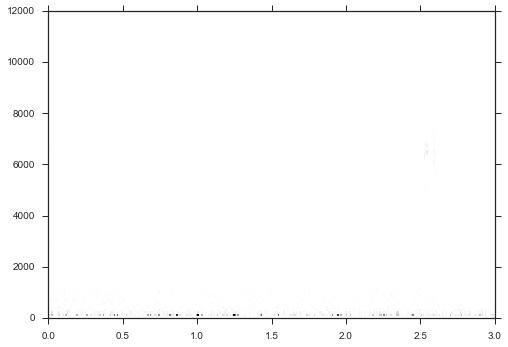

(72000,)
(129, 321)
Padding with 3 seconds of silence
(144000,)
(129, 642)


In [601]:


from scipy import signal
path="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/3h1.wav"
data ,sample_rate=loadsingal(path)
f, t, Sxx = signal.spectrogram(data,sample_rate)
plt.pcolormesh(t, f, Sxx)
plt.show()

print data.shape
print Sxx.shape

data_1=pad_audio(data,sample_rate,6.0)
f, t, Sxx = signal.spectrogram(data_1,sample_rate)
print data_1.shape
print Sxx.shape

In [546]:

#data ,sample_rate=loadsingal("/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/BECASSE FILTREe/3h4.1-EQ37B-01.wav")
#print data.shape
#print sample_rate
from scipy import signal
from scipy import signal
def spectrogram(signals,plot=False,sample_rate=24000):
    #Sxxs=np.empty((0,0))
    Sxxs=[]
    for i,data in enumerate(signals):
        f, t, Sxx = signal.spectrogram(data,sample_rate)
        #if i==0:
        #    Sxxs=Sxx
        #else:
        #    Sxxs=np.append(Sxxs, Sxx, axis=0)
        Sxxs.append(Sxx)
        print Sxx.shape 
        if plot==True:
            plt.pcolormesh(t, f, Sxx)
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.grid()
            plt.show()
    return Sxxs

spectrogram(signals_N,False,sample_rate)

(129, 1071)
(129, 1071)
(129, 1071)
(129, 1071)
(129, 1071)
(129, 642)
(129, 535)
(129, 535)
(129, 535)
(129, 535)


[array([[  6.99612758e-14,   3.87196988e-14,   5.69708600e-15, ...,
           1.02389858e-13,   3.17898834e-15,   4.42400809e-13],
        [  2.41231383e-15,   1.71115118e-15,   4.16897504e-15, ...,
           3.35765893e-15,   1.29643994e-15,   1.27368488e-14],
        [  1.05771111e-15,   1.54032028e-16,   5.01593747e-16, ...,
           1.03871132e-15,   6.26867379e-17,   4.44049018e-15],
        ..., 
        [  9.56283075e-18,   4.58859876e-16,   1.55536147e-16, ...,
           9.58096013e-16,   6.59321870e-16,   4.90217870e-17],
        [  4.60400292e-18,   2.71923887e-16,   1.22043472e-16, ...,
           1.82776539e-15,   1.44074587e-15,   1.69074288e-16],
        [  3.47298356e-18,   1.06361471e-16,   6.94763621e-17, ...,
           1.09002987e-15,   8.92245448e-16,   1.28805984e-16]], dtype=float32),
 array([[  5.39946870e-15,   1.16016417e-14,   2.50698984e-13, ...,
           2.65741070e-13,   2.90739803e-15,   9.65873228e-14],
        [  3.17983707e-15,   3.80146693e-15, 

In [543]:

Sxxs_res=spectrogram(signals,False,sample_rate)

print type(Sxxs_res)
print Sxxs_res_t.shape
print len(Sxxs_res)
print Sxxs_res[0].shape
Sxxs_res_t=np.asarray(Sxxs_res)


<type 'list'>
(10, 129, 1071)
10
(129, 1071)


In [542]:
a=spectrogram(signals_N,False,sample_rate)
print Sxxs_res_t.shape
print len(Sxxs_res)
print a[0].shape
a_t=np.asarray(a)

(10, 129, 1071)
10
(129, 1071)


ValueError: could not broadcast input array from shape (129,1071) into shape (129)

In [531]:
X_train_B=np.asarray(spectrogram(signals,False,sample_rate))
y_train_B=np.ones(len(X_train_B))  # 1:becasse, o: non becasse

X_train_N=np.asarray(spectrogram(signals_N,False,sample_rate))
y_train_N=np.zeros(len(X_train_N))  # 1:becasse, o: non becasse


X_train = X_train_B + X_train_N

y_train = np.concatenate((y_train_B,y_train_N),axis=0)

print type(X_train)
print type(y_train)

ValueError: could not broadcast input array from shape (129,1071) into shape (129)

In [333]:
import numpy as np
from matplotlib import pyplot as pl

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils import np_utils

from sklearn import metrics as me

%matplotlib inline

Using TensorFlow backend.


In [352]:
n_classes = 2
y_train_label = np_utils.to_categorical(y_train,n_classes)
print y_train_label
#test_labels = np_utils.to_categorical(test_labels_1d, n_classes)

[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


In [ ]:
X_train, y_train = data[0]

In [356]:
model = Sequential()
model.add(LSTM(32, input_shape=(len(X_train), len(y_train_label))))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_2 (LSTM)                    (None, 32)            5504        lstm_input_2[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 2)             66          lstm_2[0][0]                     
Total params: 5570
____________________________________________________________________________________________________


In [357]:
batch_size = 500
n_epoch = 30

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])

history = model.fit(X_train, y_train_label,
                    batch_size=batch_size, nb_epoch=n_epoch,
                    verbose=1, validation_data=(X_train, y_train_label))

Exception: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 arrays but instead got the following list of 10 arrays: [array([[ -4.36127514e+02,  -4.27609333e+02,  -4.27041536e+02, ...,
         -4.35049975e+02,  -4.30317303e+02,  -4.29305482e+02],
       [  3.84617457e+01,   4.15541852e+01,   4.05197038e+01, ...,
  ...

[ -7.21200391e+04 +0.j          -1.66452411e+01 +1.49046721j
  -2.37737789e+01+18.33370638j ...,  -1.01965407e+02+87.32909444j
  -8.02788717e+01 -2.40738184j   5.16663273e+01 +3.97373217j]


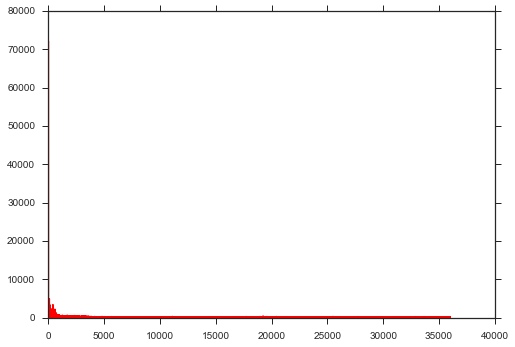

In [606]:
import matplotlib.pyplot as plt
from scipy.io import wavfile # get the api
from scipy.fftpack import fft
from pylab import *

def f(filename):
    fs, data = wavfile.read(filename) # load the data
    a = data.T[0] # this is a two channel soundtrack, I get the first track
    b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(b) # create a list of complex number
    d = len(c)/2  # you only need half of the fft list
    data=c[:(d-1)]
    plt.plot(abs(c[:(d-1)]),'r')
    savefig(filename+'.png',bbox_inches='tight')
    return data

path="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/3h1.wav"
data=f(path)
print data
    